In [1]:
from keras.datasets import mnist

In [2]:
#Download the dataset
datasets = mnist.load_data('mnist.db')

11501568/11490434 [==============================] - 4s 0us/step


In [3]:
len(datasets)

2

In [4]:
train, test = datasets

In [5]:
X_train, y_train = train
X_test, y_test = test

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
import matplotlib.pyplot as plt

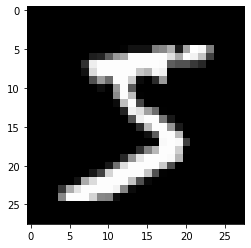

In [10]:
img1 = X_train[0]
plt.imshow(img1,cmap='gray')

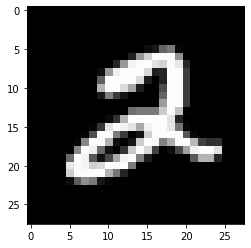

In [11]:
img2 = X_train[5]
plt.imshow(img2,cmap="gray")

In [12]:
type(img2)

numpy.ndarray

In [13]:
img2_1d = img2.reshape(28*28)

In [14]:
img2_1d.shape

(784,)

In [15]:
img2_1d

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,
        25, 100, 122,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
#We have to convert the datasets to 1D
X_train_1d = X_train.reshape(-1,28*28)
X_test_1d = X_test.reshape(-1,28*28)

In [18]:
X_train_1d.shape

(60000, 784)

In [19]:
# Here the data in integer value but we need folating value
X_train_1d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
#Converting integer vlaues to the floating value
X_train_1d_f = X_train_1d.astype('float32')
X_test_1d_f = X_test_1d.astype('float32')

In [21]:
X_train_1d_f

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
#Convert the y values to 0 and 1
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)

In [24]:
y_train[300]

8

In [25]:
y_train_cat[300]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()

In [28]:
model.add(
    Dense(units = 512,input_dim=28*28,activation='relu')
)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(
    Dense(units=256,activation='relu')
)

In [31]:
model.add(
    Dense(units=128,activation='relu')
)

In [32]:
model.add(
    Dense(units=64,activation='relu')
)

In [33]:
model.add(
    Dense(units=10,activation='softmax')
)

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(X_train_1d_f,y_train_cat,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 9ms/step - loss: 3.1198 - accuracy: 0.8095
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3510 - accuracy: 0.9302
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3684 - accuracy: 0.9317
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4408 - accuracy: 0.9262
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6020 - accuracy: 0.9015
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6317 - accuracy: 0.9035
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6607 - accuracy: 0.8883
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7165 - accuracy: 0.8709
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7595 - accuracy: 0.8656
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

### Testing

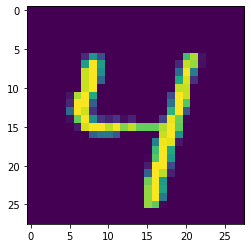

In [37]:
img_t = X_test[210]
plt.imshow(img_t)

In [38]:
img_t_1d = img_t.reshape(-1,28*28)
img_t_1d.shape

(1, 784)

In [39]:
img_t_1d

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  32, 134,  61

In [40]:
result = model.predict(img_t_1d)

In [41]:
result[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
import numpy as np
max_index = np.argmax(result[0], axis=0)
print("The Number is: ",max_index)

The Number is:  4


### Real Test

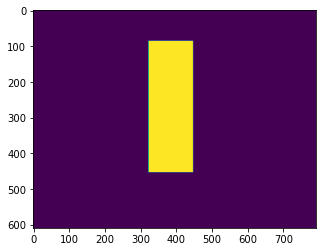

In [43]:
import cv2
img_real = cv2.imread("dig_1.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img_real)

In [44]:
img_real.shape

(609, 792)

In [45]:
img_real_t = cv2.resize(img_real,(28,28))

In [46]:
img_real_t.shape

(28, 28)

In [47]:
img_t_1d = img_real_t.reshape(-1,28*28)
img_t_1d.shape

(1, 784)

In [48]:
img_t_1d

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [49]:
result = model.predict(img_t_1d)
result[0]

array([1.3791140e-08, 9.9711823e-01, 2.3535063e-06, 6.9797416e-08,
       1.6912786e-04, 2.0817588e-08, 4.0641526e-06, 8.0755213e-04,
       1.8696955e-03, 2.8929371e-05], dtype=float32)

In [50]:
max_index = np.argmax(result[0], axis=0)
print("The Number is: ",max_index)

The Number is:  1


### Self Hand Writing

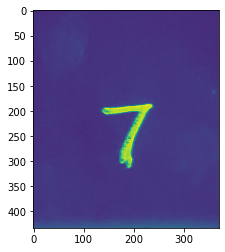

In [51]:
import cv2
img_real = cv2.imread("dig_7.jpg",cv2.IMREAD_GRAYSCALE)
img_self = cv2.bitwise_not(img_real)
plt.imshow(img_self)


In [52]:
img_self.shape

(433, 369)

In [53]:
img_self_t = cv2.resize(img_self,(28,28))

In [54]:
img_self_t.shape

(28, 28)

In [55]:
img_t_1d = img_self_t.reshape(-1,28*28)
img_t_1d.shape

(1, 784)

In [56]:
img_t_1d

array([[ 87,  83,  86,  85,  90,  89,  90,  88,  87,  87,  86,  88,  87,
         85,  89,  87,  86,  86,  88,  86,  87,  86,  86,  85,  85,  85,
         86,  82,  89,  87,  89,  88,  89,  90,  89,  91,  88,  91,  87,
         86,  87,  89,  88,  87,  89,  89,  88,  86,  87,  90,  87,  87,
         86,  86,  84,  82,  89,  87,  88,  91,  90,  89,  94,  89,  88,
         84,  87,  87,  87,  88,  88,  88,  89,  89,  88,  88,  88,  88,
         85,  87,  85,  84,  85,  88,  89,  90,  90,  92,  95,  97,  94,
         91,  85,  89,  88,  87,  86,  86,  89,  88,  88,  88,  87,  87,
         88,  89,  88,  88,  86,  85,  84,  85,  89,  91,  89,  94,  90,
         96,  96,  95,  89,  88,  88,  88,  86,  88,  89,  89,  86,  89,
         89,  89,  90,  89,  89,  88,  87,  85,  87,  86,  89,  89,  91,
         93,  93,  92,  95, 102,  87,  89,  91,  88,  87,  89,  92,  90,
         89,  88,  89,  90,  90,  89,  90,  87,  88,  89,  82,  85,  86,
         88,  90,  91,  92,  94,  91,  91,  87,  89

In [57]:
result = model.predict(img_t_1d)
result[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       4.5342903e-31, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.3251335e-15], dtype=float32)

In [58]:
max_index = np.argmax(result[0], axis=0)
print("The Number is: ",max_index)

The Number is:  7
